In [2]:
# import os
# import numpy as np
# # split full data into 2 mutually exclusive subfolders
# input_dir = "./../INPUT_all/data/combined_data"
# output_dir_A = "./../INPUT_all/data/combined_split_A"
# output_dir_B = "./../INPUT_all/data/combined_split_B"
# 
# # Read files into a numpy array
# file_list = os.listdir(input_dir)[1:]
# print(file_list)
# # for file in file_list
# for cat in range(10):
#     file = file_list[cat]
#     data = np.loadtxt(os.path.join(input_dir, file), dtype=str)
# 
#     split_index = len(data) // 2
#     split_A = data[:split_index]
#     split_B = data[split_index:]
#     if len(split_A) > len(split_B):
#         split_A = split_A[:len(split_B)]
#     else:
#         split_B = split_B[:len(split_A)]
# 
# 
#     np.savetxt(os.path.join(output_dir_A, f"half-images-unlabeled-{cat}.dat"), split_A, fmt="%s")
#     np.savetxt(os.path.join(output_dir_B, f"half-images-unlabeled-{cat}.dat"), split_B, fmt="%s")


In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [10]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [13]:

# testing
digit = 0
nr_runs = 99
sample_sizes = [2000,3000]
stats_a_seeA = utils.letter_means_stds("B", sample_sizes, nr_runs, digit,recreate_letter="B", add_smooth=False)


nested
10 99
True -78694.12171061203 -78694.12171061203
10 99
True -78556.25978534916 -78556.25978534916
10 99
True -78670.16428069667 -78670.16428069667
10 99
True -78655.153754454 -78655.153754454
10 99
True -78629.26895270328 -78629.26895270328
10 99
True -78321.72893635972 -78321.72893635972
10 99
True -79001.99190006837 -79001.99190006837
10 99
True -78746.04429950066 -78746.04429950066


KeyboardInterrupt: 

In [5]:



stats_a_seeA = utils.letter_means_stds("A", sample_sizes, nr_runs, digit,recreate_letter="A", add_smooth=False)
stats_a_seeB = utils.letter_means_stds("A", sample_sizes, nr_runs, digit,recreate_letter="B", add_smooth=False)

../INPUT/data/half-images-unlabeled-2.dat
../INPUT/data/half-images-unlabeled-3.dat
../INPUT/data/half-images-unlabeled-1.dat
../INPUT/data/half-images-unlabeled-0.dat
../INPUT/data/half-images-unlabeled-4.dat
../INPUT/data/half-images-unlabeled-5.dat
../INPUT/data/half-images-unlabeled-7.dat
../INPUT/data/half-images-unlabeled-6.dat
../INPUT/data/half-images-unlabeled-8.dat
../INPUT/data/half-images-unlabeled-9.dat
../INPUT/data/half-images-unlabeled-2.dat
../INPUT/data/half-images-unlabeled-3.dat
../INPUT/data/half-images-unlabeled-1.dat
../INPUT/data/half-images-unlabeled-0.dat
../INPUT/data/half-images-unlabeled-4.dat
../INPUT/data/half-images-unlabeled-5.dat
../INPUT/data/half-images-unlabeled-7.dat
../INPUT/data/half-images-unlabeled-6.dat
../INPUT/data/half-images-unlabeled-8.dat
../INPUT/data/half-images-unlabeled-9.dat
../INPUT/data/half-images-unlabeled-2.dat
../INPUT/data/half-images-unlabeled-3.dat
../INPUT/data/half-images-unlabeled-1.dat
../INPUT/data/half-images-unlabele

In [6]:
nr_runs = 99
sample_sizes = [100, 1000,2000,3000]

stats_b_seeA = utils.letter_means_stds("B", sample_sizes, nr_runs, digit,recreate_letter="A",add_smooth=False)
stats_b_seeB = utils.letter_means_stds("B", sample_sizes, nr_runs, digit,recreate_letter="B",add_smooth=False)

../INPUT/data/half-images-unlabeled-2.dat
../INPUT/data/half-images-unlabeled-3.dat
../INPUT/data/half-images-unlabeled-1.dat
../INPUT/data/half-images-unlabeled-0.dat
../INPUT/data/half-images-unlabeled-4.dat
../INPUT/data/half-images-unlabeled-5.dat
../INPUT/data/half-images-unlabeled-7.dat
../INPUT/data/half-images-unlabeled-6.dat
../INPUT/data/half-images-unlabeled-8.dat
../INPUT/data/half-images-unlabeled-9.dat
../INPUT/data/half-images-unlabeled-2.dat
../INPUT/data/half-images-unlabeled-3.dat
../INPUT/data/half-images-unlabeled-1.dat
../INPUT/data/half-images-unlabeled-0.dat
../INPUT/data/half-images-unlabeled-4.dat
../INPUT/data/half-images-unlabeled-5.dat
../INPUT/data/half-images-unlabeled-7.dat
../INPUT/data/half-images-unlabeled-6.dat
../INPUT/data/half-images-unlabeled-8.dat
../INPUT/data/half-images-unlabeled-9.dat
../INPUT/data/half-images-unlabeled-2.dat
../INPUT/data/half-images-unlabeled-3.dat
../INPUT/data/half-images-unlabeled-1.dat
../INPUT/data/half-images-unlabele

In [7]:
mapping = {"A":[stats_a_seeA, stats_a_seeB], "B": [stats_b_seeB, stats_b_seeA]}


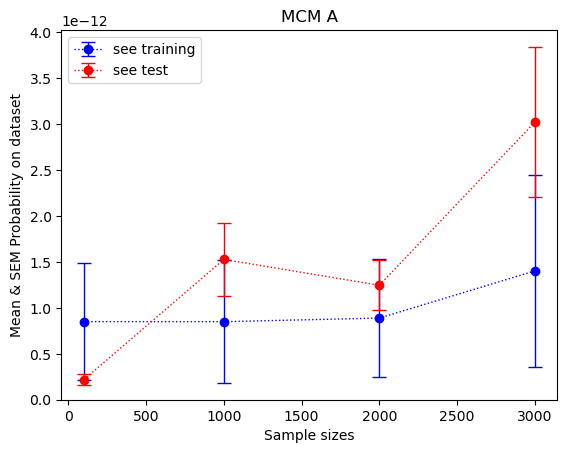

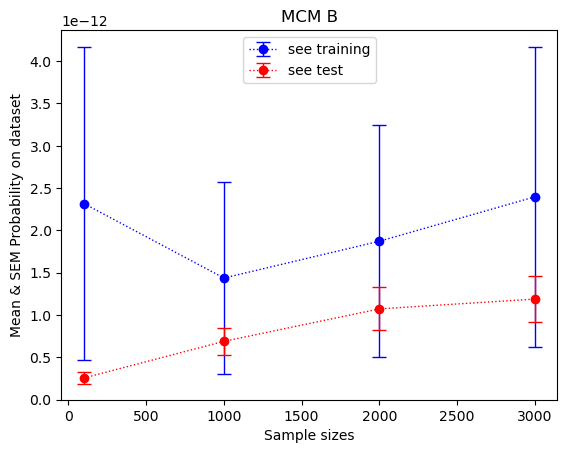

In [8]:


colors = ["b","r"]
label = ["see training", "see test"]

plt.figure()

mapping = {"A":[stats_a_seeA, stats_a_seeB], "B": [stats_b_seeB, stats_b_seeA]}

for let,vals in mapping.items():

    sample_sizes = [100, 1000,2000,3000]
    for i, stats in enumerate(vals):
        arr = np.array(np.mean(stats,axis=1))

        plt.errorbar(sample_sizes, arr[:,0], yerr=arr[:, 1]/np.sqrt(sample_sizes[i]), fmt='o', capsize=5, linewidth=1,color=colors[i],label=label[i], linestyle=":")
    plt.title(f"MCM {let}")
    plt.xlabel("Sample sizes")
    plt.ylabel("Mean & SEM Probability on dataset")

    plt.ylim((0,None))
    plt.legend()
    plt.show()



-----------------------

In [9]:
# probs = np.empty((n_icc,sample_size))
# for i in range(len(ranks)):
#     probs[i,:] = counts_to_prob(counts_observe_X[i],ranks[i], sum_of_count)
# probs_mcm = np.product(probs,axis=0)

# # return np.mean(probs_mcm), np.std(probs_mcm)

In [10]:
# print(probs_mcm.shape)

In [11]:
# calculate average probability for digit 0 for 10 samples sample idx 0 for seeing a 0 of dataset B


In [12]:
# now working with A only
# for every sample size
# for every sample, need to calculate average probability of seeing seed=42 sample in dataset B
# then we calculate the mean + std over the 50 samples in a sample size

# do the same with B

In [13]:
n_variables = 121
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"
sample_size = 10
C = counts_sample[0]
all_MCM = mcm_sample[0]

# # for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_C_icc = myplot.calculate_P_icc(C, all_MCM, 0, n_variables, data_path, data_filename_format)


np.save(samples_path + f"/{sample_size}/all_C_icc_c{digit}_s{sample_idx}.npy", all_C_icc)

del all_C_icc

NameError: name 'counts_sample' is not defined

In [ ]:
all_C_icc_c0_s0 = np.load(samples_path + f"/{sample_size}/all_C_icc_c0_s0.npy")

In [ ]:
all_C_icc_c0_s0.shape

(21, 5423, 10)

In [ ]:
mcms_fname = "MCMs_0.json"
counts_fname = "Counts_0.json"
n_samples = 100

with open(os.path.join(samples_path,str(n_samples),"MCMs", mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(n_samples),"Counts", counts_fname), "r") as f:
        C = json.load(f

In [ ]:
n_variables = 121 #TODO This cell is not trash.
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"

# # for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_C_icc_3 = myplot.calculate_P_icc(C, all_MCM, 3, n_variables, data_path, data_filename_format)
np.save("../OUTPUT/sample_sizes/5423/all_C_icc_3.npy", all_C_icc_3)


all_C_icc_3 = np.load("../OUTPUT/sample_sizes/5423/all_C_icc_3.npy")